In [169]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
# read in the data
conspiracy = pd.read_csv('./data/conspiracy_dataset.csv')
qanoncas= pd.read_csv('./data/QAnonCasualties_dataset.csv')

In [5]:
conspiracy.shape

(1000, 3)

In [4]:
conspiracy = conspiracy[['title','selftext','subreddit']]

In [8]:
qanoncas.shape

(1000, 3)

In [7]:
qanoncas = qanoncas[['title','selftext','subreddit']]

In [10]:
qcas_con = pd.concat([conspiracy,qanoncas])

In [11]:
qcas_con.head()

,title,selftext,subreddit
0,Russia using TASK FORCE to break into peoples ...,NaN,conspiracy
1,Who do you think this guy is? Could it have an...,https://youtu.be/tWdgAMYjYSs\n\n anyone have a...,conspiracy
2,There is a reason why Holocaust survivors neve...,"So basically it’s ok to marginalize, blackball...",conspiracy
3,Sophia The Robot Has Saudi Arabian Citizenship!,NaN,conspiracy
4,Infinity War – Gliding Through The Many Worlds,NaN,conspiracy


In [ ]:
qcas_con.to_csv('total.csv')

In [14]:
qcas_con.reset_index(drop=True, inplace=True)

In [15]:
qcas_con

,title,selftext,subreddit
0,Russia using TASK FORCE to break into peoples ...,NaN,conspiracy
1,Who do you think this guy is? Could it have an...,https://youtu.be/tWdgAMYjYSs\n\n anyone have a...,conspiracy
2,There is a reason why Holocaust survivors neve...,"So basically it’s ok to marginalize, blackball...",conspiracy
3,Sophia The Robot Has Saudi Arabian Citizenship!,NaN,conspiracy
4,Infinity War – Gliding Through The Many Worlds,NaN,conspiracy
...,...,...,...
1995,On the connection between financial instabilit...,[A majority of the people arrested for Capitol...,QAnonCasualties
1996,My 3 y/o niece has nightmares about being cann...,So most of my in-laws are pretty deep into the...,QAnonCasualties
1997,In Laws are brainwashed,"Hello,\n\n Over the last 4 years my wife’s pa...",QAnonCasualties
1998,"Is this part of the QAnon culture? ""The New No...",[https://muse.ai/v/CRFPmJ1-The-New-Normal-Docu...,QAnonCasualties


In [16]:
#DSIR-Lancelot /5.04-lesson-nlp-ii
# Convert to binary:
# subreddit column convert to: is_conspiracy

qcas_con.rename(columns= {'subreddit': 'is_conspiracy'}, inplace=True)


In [17]:
# 0 for QAnonCasualties
# 1 for conspiracy

convert_label = {
    'QAnonCasualties': 0,
    'conspiracy': 1
}
qcas_con['is_conspiracy'] = qcas_con['is_conspiracy'].map(convert_label)

In [171]:
qcas_con.to_csv('total_cleaned.csv')

In [19]:
#checking the baseline value, should be .5 because there is even numbers between the 2 datasets 
qcas_con['is_conspiracy'].value_counts(normalize=True)

1    0.5
0    0.5
Name: is_conspiracy, dtype: float64

In [20]:
#inspired by lab 5.02
#counting the number of chras and words in title field

qcas_con['title_char_length'] = qcas_con['title'].str.len()
qcas_con['title_word_count']= qcas_con['title'].str.split().str.len()

qcas_con.head(35)

,title,selftext,is_conspiracy,title_char_length,title_word_count
0,Russia using TASK FORCE to break into peoples ...,NaN,1,93,16
1,Who do you think this guy is? Could it have an...,https://youtu.be/tWdgAMYjYSs\n\n anyone have a...,1,82,17
2,There is a reason why Holocaust survivors neve...,"So basically it’s ok to marginalize, blackball...",1,89,16
3,Sophia The Robot Has Saudi Arabian Citizenship!,NaN,1,47,7
4,Infinity War – Gliding Through The Many Worlds,NaN,1,46,8
5,Are there any good covid conspiracy videos out...,NaN,1,53,9
6,LUCES EN EL CIELO 2021#UFO #OVNI #ANOMALIAS LU...,NaN,1,75,12
7,The devil isn't sinful,If you are a Christian (i am) you know that si...,1,22,4
8,Excelsior Pass,NaN,1,14,2
9,Anybody Else Seeing This Intel? Also Been Hear...,NaN,1,294,44


In [21]:
pd.options.display.max_rows = 999

In [29]:
qcas_con.sort_values(by='title_char_length', ascending=False)

,title,selftext,is_conspiracy,title_char_length,title_word_count
1199,Can Cult Studies Offer Help With QAnon? The Sc...,....as we learn more about how to deal with th...,0,305,54
1436,Anybody's entire genetic line sucked in? My br...,"It's not just our closest relationships, like ...",0,301,52
366,On the left hand side is a picture taken from ...,NaN,1,300,50
112,"Situation Update, Mar. 2nd – ASIANS are finall...",NaN,1,300,47
1647,Yesterday I wrote about an antivax video forwa...,I'm not going to just make wild accusations of...,0,300,57
...,...,...,...,...,...
319,Ummmm,NaN,1,5,1
439,epic,[removed],1,4,1
1391,Lost,I am slowly losing my marriage to the Q. I hav...,0,4,1
1144,THI,I am new to this group and so grateful it is h...,0,3,1


In [31]:
qcas_con.sort_values(by='title_char_length').head(6)

,title,selftext,is_conspiracy,title_char_length,title_word_count
1144,THI,I am new to this group and so grateful it is h...,0,3,1
363,Oof,NaN,1,3,1
439,epic,[removed],1,4,1
1391,Lost,I am slowly losing my marriage to the Q. I hav...,0,4,1
560,Proof,NaN,1,5,1
1593,PSAs?,Maybe it's time for good old fashioned PSAs fo...,0,5,1


In [28]:
qcas_con.sort_values(by='title_word_count', ascending=True).head(6)

,title,selftext,is_conspiracy,title_char_length,title_word_count
344,https://sites.google.com/view/howtohealcovid19...,NaN,1,62,1
26,Yeah!,NaN,1,5,1
1593,PSAs?,Maybe it's time for good old fashioned PSAs fo...,0,5,1
1012,Colleagues,I used to be into conspiracies as an adolescen...,0,10,1
1391,Lost,I am slowly losing my marriage to the Q. I hav...,0,4,1
1017,03/04/21,Anyone else a bit worried about what might go ...,0,8,1


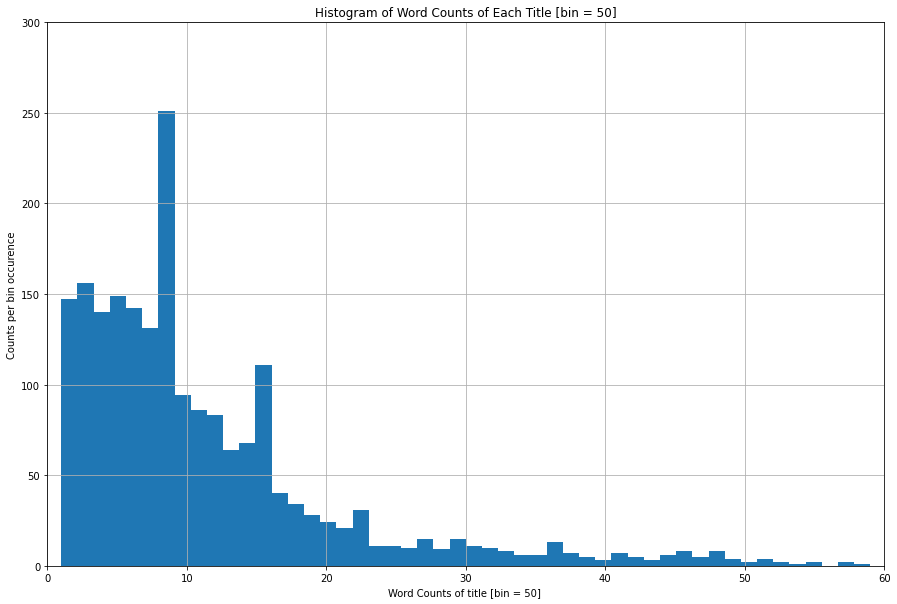

In [35]:
#thanks to ofili for this code during 5.02 review
plt.figure(figsize=(15,10))
plt.gca().set(ylim =(0,300))
plt.gca().set(xlim =(0,60))
plt.xlabel("Word Counts of title [bin = 50] ")
plt.ylabel("Counts per bin occurence")
plt.title ("Histogram of Word Counts of Each Title [bin = 50]")
qcas_con['title_word_count'].hist(bins=50);

This histogram shows that titles range from 1 to about 60 wordds, with up to about 250 characters.

/Users/merylduff/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/merylduff/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


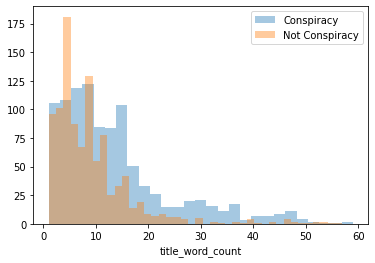

In [88]:
# submissions/labs/5.02-lab-nlp-eda-master review
sns.distplot(qcas_con[qcas_con['is_conspiracy'] == 1]['title_word_count'], kde=False, label='Conspiracy')
sns.distplot(qcas_con[qcas_con['is_conspiracy'] == 0]['title_word_count'], kde=False, label='Not Conspiracy')
plt.legend();

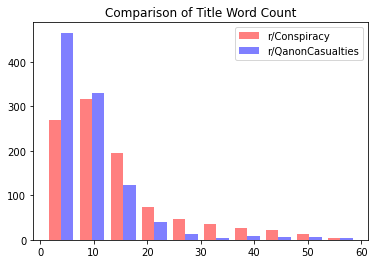

In [168]:
#https://stackoverflow.com/questions/36362624/how-to-plot-multiple-histograms-on-same-plot-with-seaborn

plt.title(label = 'Comparison of Title Word Count' )
cons = qcas_con[qcas_con['is_conspiracy'] == 1]['title_word_count']
qcasualties = qcas_con[qcas_con['is_conspiracy'] == 0]['title_word_count']
plt.hist([cons, qcasualties], color=['r','b'], alpha=0.5)
plt.legend(['r/Conspiracy', 'r/QanonCasualties'], loc='upper right');

In [170]:
cv = CountVectorizer()